# Bibliotecas utilizadas

## !pip install
Esses comandos são utilizados para instalar bibliotecas no ambiente do Jupyter Notebook ou Google Colab.

- `!pip install plotly`: Instala a biblioteca Plotly, usada para visualizações interativas.
- `!pip install pandas`: Instala o Pandas, biblioteca para manipulação de dados.
- `!pip install ipywidgets`: Instala o ipywidgets, que permite criar elementos interativos como sliders e dropdowns.

---

## Bibliotecas importadas

### `import pandas as pd`
O **Pandas** é usado para:
- Carregar e salvar dados (ex: CSV, Excel, SQL)
- Manipular tabelas (DataFrames)
- Tratar dados ausentes, agrupar dados, transformar colunas etc.

---

### `import matplotlib.pyplot as plt`
O **Matplotlib** é uma biblioteca de visualização:
- Cria gráficos estáticos como linhas, barras e dispersão.
- `pyplot` é o módulo mais usado para gerar plots rapidamente.

---

### `import numpy as np`
O **NumPy** é utilizado para:
- Trabalhar com arrays e operações matemáticas de alto desempenho.
- Usado amplamente em cálculos numéricos e científicos.

---

### `from IPython.display import display, HTML`
Permite:
- Usar funções do IPython para exibir objetos com mais controle.
- `display()`: exibe objetos como DataFrames de forma interativa.
- `HTML()`: renderiza código HTML diretamente na célula do notebook.

---

### `import seaborn as sns`
O **Seaborn** é uma biblioteca baseada no Matplotlib:
- Cria gráficos estatísticos com visual mais bonito e sofisticado.
- Ideal para análise exploratória e visualização de correlações, distribuições etc.

---

### `import plotly.express as px`
**Plotly Express** é uma interface de alto nível da Plotly:
- Permite criar gráficos interativos de forma simples (ex: linhas, barras, caixas).
- Ótimo para animações e visualizações dinâmicas.

---

### `import plotly.graph_objects as go`
**Plotly Graph Objects** oferece controle mais detalhado:
- Permite criar gráficos interativos mais personalizados que o `plotly.express`.
- Recomendado para gráficos compostos ou altamente customizados.

---

### `import ipywidgets as widgets`
**ipywidgets** permite adicionar interatividade ao notebook:
- Cria controles como botões, sliders, menus dropdown etc.
- Ideal para dashboards, filtros e seleção de dados.

---

### `import re`
A biblioteca **re** é usada para expressões regulares:
- Permite procurar e manipular padrões em strings.
- Útil para limpeza, extração e validação de textos.



In [73]:
!pip install plotly
!pip install pandas
!pip install ipywidgets

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML, clear_output
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
import re
import seaborn as sns



# Carregar Base de Dados

visualização da base, decrisão e informações



In [74]:
df = pd.read_csv('dados_inflacao_colunas_filtradas_2015_2024.csv')
df
df.describe()
df.info()
for col in df.columns:
    nulos = df[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   2015            194 non-null    float64
 3   2016            194 non-null    float64
 4   2017            195 non-null    float64
 5   2018            195 non-null    float64
 6   2019            195 non-null    float64
 7   2020            194 non-null    float64
 8   2021            194 non-null    float64
 9   2022            194 non-null    float64
 10  2023            192 non-null    float64
 11  2024            191 non-null    float64
dtypes: float64(10), object(2)
memory usage: 18.5+ KB
numero de valores nulos na coluna country_name é: 0
numero de valores nulos na coluna indicator_name é: 0
numero de valores nulos na coluna 2015 é: 2
numero de valores nulos na coluna 2016 é: 2
numero de valores

# Matriz de correlação dos 10 principais países com PIB

### Objetivo:
Analisar a **correlação do PIB** ao longo do tempo entre os 10 países mais ricos do mundo (de acordo com os dados do DataFrame).

---

### Etapas do código:

#### 1. `df_copy.drop('indicator_name', axis=1, inplace=True)`
Remove a coluna `'indicator_name'`, pois ela não é necessária para a análise de correlação.

#### 2. `df_copy.set_index('country_name', inplace=True)`
Define os nomes dos países como índice (linhas) do DataFrame, facilitando o acesso e transposição.

#### 3. `df_transposed = df_copy.T`
Transpõe o DataFrame: os **anos passam a ser linhas** e os **países passam a ser colunas**, permitindo comparar os dados ano a ano.

#### 4. Lista de países:

```
countries = [
    "United States", "China, People's Republic of", "Japan", "Germany", "India",
    "United Kingdom", "France", "Italy", "Canada", "Brazil"
    ]
```

Seleciona os 10 países com as maiores economias para filtrar no DataFrame.

#### 5. `df_filtered = df_transposed[countries]`
Filtra o DataFrame transposto para incluir apenas os países da lista.

#### 6. `corr = df_filtered.corr()`

Calcula a matriz de correlação entre os países, comparando como os PIBs de cada um variam ao longo do tempo.

#### 7. Visualização com seaborn:
```
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
```
Cria um heatmap (mapa de calor) mostrando os níveis de correlação entre os países.
```
annot=True: mostra os valores dentro dos quadrados.

fmt=".2f": formata os números com 2 casas decimais.

cmap='coolwarm': usa uma paleta de cores com azul/vermelho.

cbar=True: exibe a barra de cor à direita.
```
#### 8. Estilização e exibição:
```
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Matriz de correlação dos 10 principais países com PIB')
plt.show()
```
Melhora a visualização girando os rótulos dos eixos e adiciona um título ao gráfico.

```
df_copy = df.copy(deep=True)
filtrar_economias_líderes_e_plotar_correlação(df_copy)
```
Faz uma cópia profunda do DataFrame original (df) para evitar modificações indesejadas, e então chama a função.

#### Resultado:
Uma matriz de correlação visual que mostra como os PIBs dos países se relacionam entre si ao longo do tempo, destacando padrões de crescimento semelhantes ou divergentes.

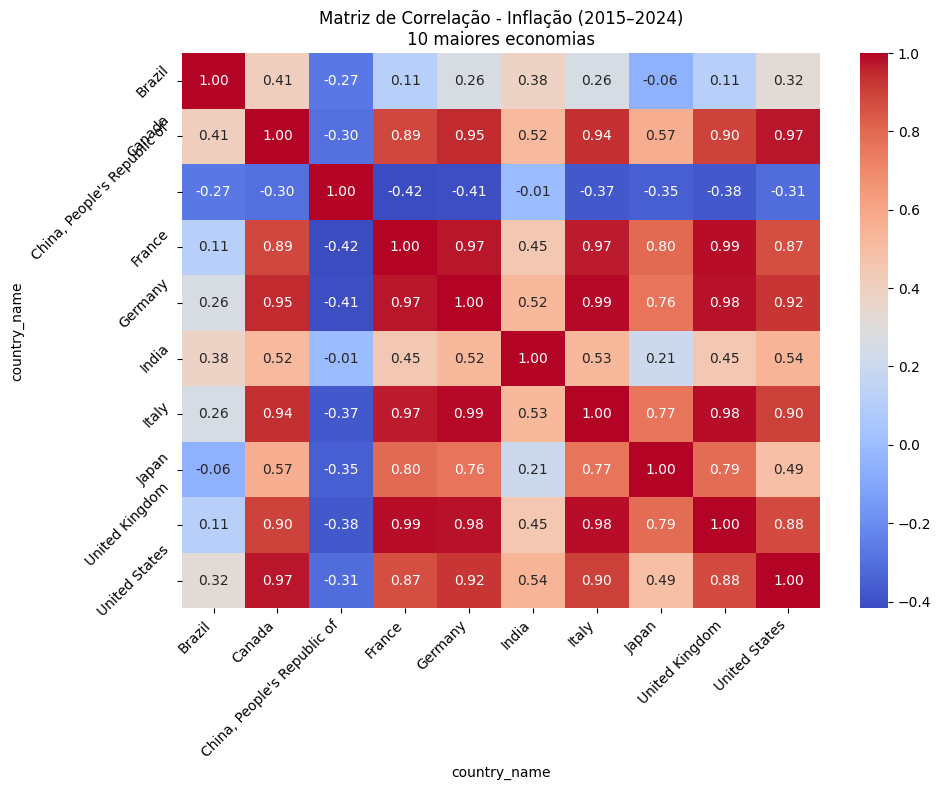

In [75]:

def filtrar_economias_lideres_e_plotar_correlacao(df):
    # Garantir que só colunas de anos sejam usadas
    anos = [str(ano) for ano in range(2015, 2025)]
    df_filtrado = df[['country_name'] + anos].copy()

    # Definir países de interesse (ajuste se algum nome estiver diferente na base)
    countries = [
        "United States", "China, People's Republic of", "Japan", "Germany", "India",
        "United Kingdom", "France", "Italy", "Canada", "Brazil"
    ]

    # Filtrar países que realmente existem na base
    countries_presentes = [pais for pais in countries if pais in df_filtrado['country_name'].values]

    # Avisar se algum país não foi encontrado
    ausentes = list(set(countries) - set(countries_presentes))
    if ausentes:
        print("Aviso: Países ausentes na base e ignorados:", ausentes)

    # Filtrar e preparar para correlação
    df_sub = df_filtrado[df_filtrado['country_name'].isin(countries_presentes)]
    df_sub.set_index('country_name', inplace=True)
    df_transposta = df_sub.T  # anos como linhas

    # Calcular correlação entre países
    corr = df_transposta.corr()

    # Plotar heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Matriz de Correlação - Inflação (2015–2024)\n10 maiores economias')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Executar com sua base
filtrar_economias_lideres_e_plotar_correlacao(df)


# Grafico Inflação ao Longo dos Anos



## Objetivo:
Plotar gráficos de linha da **inflação ao longo dos anos para múltiplos países**, em uma grade de subplots.

---

## Parâmetros:

- `df`: DataFrame com os dados de inflação, onde cada linha representa um país.
- `num_graphs`: número de gráficos (países) a serem plotados.

---

## Etapas do código:

### 1. Limita o número de gráficos ao número de países disponíveis:
```
num_countries = min(num_graphs, df.shape[0])
````

Evita tentar plotar mais países do que existem no DataFrame.

---

### 2. Define o layout da grade de subplots:

```
ncols = 2  # 2 colunas por linha
nrows = int(num_countries / ncols) + (num_countries % ncols > 0)
```

Calcula o número de linhas necessário para exibir os gráficos em duas colunas.

---

### 3. Cria a figura e os eixos:

```
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
```

Ajusta o tamanho da figura e o espaçamento entre os subplots.

---

### 4. Loop pelos países para plotar os dados:

Para cada país:

* Pega os dados da inflação (exclui as duas primeiras colunas: nome do país e indicador).
* Converte os anos para inteiros.
* Converte os valores para numéricos, substituindo erros por `NaN`.
* Aplica **cap (limite)** de 120 para valores acima de 100 (tratamento visual).

```python
modified_values = np.where(values > 100, 120, values)
```

* Plota o gráfico com marcador e linha contínua.
* Ajusta os ticks do eixo Y para mostrar `100+` nos valores truncados.

---

### 5. Ajuste final:

Se houver um subplot extra (em caso de número ímpar de países), ele é desativado:

```python
if num_countries % ncols:
    axs[-1, -1].axis('off')
```

---

### 6. Exibe a figura:

```python
plt.tight_layout()
plt.show()
```

---

## Exemplo de chamada:

```python
plot_inflation_graphs(df, num_graphs=197)
```

Gera gráficos de inflação para os 197 países do DataFrame.

---

## Resultado:

Uma visualização organizada de gráficos de inflação por país, facilitando a comparação temporal e destacando países com inflação muito alta (valores acima de 100 são truncados para "100+").



In [76]:
import numpy as np
import matplotlib.pyplot as plt

def plot_inflation_graphs(df, num_graphs=20):
    num_countries = min(num_graphs, df.shape[0])

    ncols = 2
    nrows = int(num_countries / ncols) + (num_countries % ncols > 0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num_countries):
        row = i // ncols
        col = i % ncols

        # Começando na coluna 2 (a partir de 2015), assumindo a primeira é country_name e a segunda é indicator_name
        country_data = df.iloc[i, 2:]  # Change made here
        years = country_data.index.astype(int)
        values = pd.to_numeric(country_data.values, errors='coerce')
        modified_values = np.where(values > 100, 120, values)

        ax = axs[row, col] if nrows > 1 else axs[col] if nrows == 1 else axs
        ax.plot(years, modified_values, marker='o', linestyle='-')
        ax.set_title(df.iloc[i, 0])
        ax.set_xlabel("Ano")
        ax.set_ylabel("Inflação (%)")
        ax.grid(True)
        ax.tick_params(labelrotation=45)

        # Substituir valores extremos por "100+"
        y_ticks = ax.get_yticks()
        y_ticks = y_ticks[y_ticks <= 120]
        y_tick_labels = [f"{y:.0f}" if y < 120 else "100+" for y in y_ticks]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_tick_labels)

    # Desliga último gráfico vazio, se existir
    if num_countries % ncols:
        axs[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()

# Rodar com os 20 primeiros países (mude o número se quiser)
plot_inflation_graphs(df, num_graphs=196)




#  Visualização da Inflação Anual por País (2015–2024)

Este trecho de código permite **visualizar a série temporal de inflação anual** para qualquer país presente no DataFrame `df`, entre os anos de **2015 e 2024**, utilizando um gráfico de linha com interação via dropdown (`ipywidgets`).

---

```python
paises = sorted(df['country_name'].dropna().unique().tolist())
```

* Extrai todos os nomes únicos de países da coluna `country_name`, removendo valores ausentes (`NaN`).
* Converte para lista e ordena alfabeticamente.
* Resultado: uma lista com os países disponíveis, usada como opções no widget interativo.

---

```python
def grafico_pais(pais):
```

* Define a função `grafico_pais`, que recebe um nome de país como argumento e gera um gráfico de inflação para esse país.

---

```python
    serie = df[df['country_name'] == pais].iloc[0][[str(a) for a in range(2015, 2025)]]
```

* Filtra o DataFrame `df` para obter a linha correspondente ao país selecionado.
* Seleciona apenas as colunas de ano entre **2015 e 2024**.
* `iloc[0]` garante que apenas a **primeira linha correspondente ao país** seja usada (evita erro se houver duplicatas).
* Armazena a série de inflação em uma variável chamada `serie`.

---

```python
    serie = pd.to_numeric(serie, errors='coerce')
```

* Converte os valores da série para números (`float`), substituindo erros por `NaN` (caso haja strings ou valores inválidos).

---

```python
    plt.figure(figsize=(10,5))
```

* Cria uma nova figura Matplotlib com tamanho 10x5 polegadas.

---

```python
    plt.plot(serie.index, serie.values, marker='o', linestyle='-')
```

* Plota a inflação ano a ano:

  * `serie.index` contém os anos como rótulos no eixo X.
  * `serie.values` contém os valores de inflação (eixo Y).
  * `marker='o'` adiciona marcadores circulares nos pontos.
  * `linestyle='-'` cria uma linha conectando os pontos.

---

```python
    plt.title(f'Inflação anual em {pais} (2015–2024)')
```

* Define o título do gráfico, incluindo o nome do país selecionado.

---

```python
    plt.xlabel('Ano')
    plt.ylabel('Inflação (%)')
```

* Define os rótulos dos eixos X e Y.

---

```python
    plt.grid(True)
```

* Ativa a grade no fundo do gráfico para facilitar a leitura dos valores.

---

```python
    plt.xticks(rotation=45)
```

* Rotaciona os rótulos do eixo X (anos) em 45 graus, evitando sobreposição e melhorando a legibilidade.

---

```python
    plt.tight_layout()
```

* Ajusta automaticamente o layout do gráfico para que nada fique cortado.

---

```python
    plt.show()
```

* Exibe o gráfico gerado.

---

```python
widgets.interact(grafico_pais, pais=paises);
```

* Cria um **widget interativo com um menu suspenso** contendo todos os países da lista `paises`.
* Ao selecionar um país, o gráfico correspondente à inflação anual de 2015 a 2024 é exibido dinamicamente.

---

###  Resultado:

* Um gráfico de linha interativo para explorar a inflação anual por país.
* Muito útil para análises comparativas ou identificação de picos/padrões de inflação ao longo do tempo.

In [77]:
paises = sorted(df['country_name'].dropna().unique().tolist())

def grafico_pais(pais):
    serie = df[df['country_name'] == pais].iloc[0][[str(a) for a in range(2015, 2025)]]
    serie = pd.to_numeric(serie, errors='coerce')
    plt.figure(figsize=(10,5))
    plt.plot(serie.index, serie.values, marker='o', linestyle='-')
    plt.title(f'Inflação anual em {pais} (2015–2024)')
    plt.xlabel('Ano')
    plt.ylabel('Inflação (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

widgets.interact(grafico_pais, pais=paises);


interactive(children=(Dropdown(description='pais', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'A…


# Mapa Interativo de Inflação Global

## Objetivo:
Exibir a inflação de cada país em um mapa-múndi interativo, com a possibilidade de selecionar o **ano** por meio de um **menu suspenso (dropdown)**.

---

## Etapas do Código:

### 1. Seleção das colunas numéricas (anos):
```
anos = [col for col in df.columns if col.isnumeric()]
anos.sort()
````

Extrai todas as colunas do DataFrame `df` que representam **anos** (valores numéricos), e ordena.

---

### 2. Criação da figura:

```
fig = go.Figure()
```

Inicializa uma figura `plotly.graph_objects`.

---

### 3. Adição de um mapa para cada ano:

```
for i, ano in enumerate(anos):
    dados_ano = df[['country_name', ano]].copy()
    ...
    fig.add_trace(go.Choropleth(...))
```

Para cada ano:

* Cria um subconjunto dos dados com o nome do país e o valor de inflação do ano.
* Converte os dados para tipo numérico, ignorando erros.
* Adiciona um **Choropleth Map** (mapa coroplético) à figura, representando os dados daquele ano.

Apenas o **último ano** é visível inicialmente:

```
visible=(i == len(anos) - 1)
```

---

### 4. Criação dos botões do menu suspenso:

```
botões = [dict(...)]
```

Gera uma lista de dicionários, cada um criando um botão no dropdown para selecionar um ano específico. Ao clicar:

* Altera os dados visíveis (`visible`) para mostrar apenas o mapa do ano correspondente.
* Atualiza o título do gráfico.

---

### 5. Configuração do layout:

```
fig.update_layout(...)
```

Define o layout da visualização:

* Título inicial com o último ano.
* Remove moldura e linhas costeiras do mapa.
* Insere o menu suspenso no topo.
* Ajusta margens.

---

### 6. Exibição do gráfico:

```
fig.show()
```

Renderiza o gráfico interativo no notebook.

---

## Resultado:

Um **mapa global de inflação** onde é possível explorar diferentes anos através de um **dropdown menu**. A cor de cada país varia conforme a taxa de inflação, com uma escala padronizada entre `-10%` e `100%`.



In [78]:
anos = [col for col in df.columns if col.isnumeric()]
anos.sort()

fig = go.Figure()

for i, ano in enumerate(anos):
    dados_ano = df[['country_name', ano]].copy()
    dados_ano[ano] = pd.to_numeric(dados_ano[ano], errors='coerce')

    fig.add_trace(go.Choropleth(
        locations=dados_ano['country_name'],
        locationmode='country names',
        z=dados_ano[ano],
        colorscale='OrRd',
        colorbar_title='Inflação (%)',
        zmin=-10,
        zmax=100,
        visible=(i == len(anos) - 1),
        name=str(ano)
    ))


botões = [
    dict(
        method="update",
        label=ano,
        args=[{"visible": [i == j for i in range(len(anos))]},
              {"title": f"Inflação Global por País - {ano}"}]
    )
    for j, ano in enumerate(anos)
]

fig.update_layout(
    title=f"Inflação Global por País - {anos[-1]}",
    geo=dict(showframe=False, showcoastlines=False),
    updatemenus=[dict(
        active=len(anos) - 1,
        buttons=botões,
        direction="down",
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    margin=dict(t=80, l=0, r=0, b=0)
)

fig.show()



# Gráfico de Linha: Inflação Média Global (2015–2024)

## Objetivo:
Visualizar a **tendência da inflação média global** ano a ano, utilizando os dados agregados de todos os países disponíveis no DataFrame.

---

## Explicação por etapas:

### 1. Selecionar as colunas que representam os anos
```
colunas_ano = [col for col in df.columns if col.isnumeric()]
````

Extrai as colunas cujo nome é numérico, assumindo que essas colunas correspondem aos anos (ex: "2015", "1981", ..., "2024").

---

### 2. Converter dados para tipo numérico e calcular a média por ano

```
df_anos = df[colunas_ano].apply(pd.to_numeric, errors='coerce')
media_global = df_anos.mean(axis=0)
```

* Converte os valores dessas colunas para `float`, tratando erros com `NaN`.
* Calcula a **média global da inflação** para cada ano (eixo X = anos, eixo Y = inflação média).

---

### 3. Gerar o gráfico

```
plt.figure(figsize=(14, 6))
plt.plot(media_global.index, media_global.values, marker='o', linestyle='-', color='teal')
```

* Define o tamanho da figura.
* Plota a linha da inflação média com **pontos marcados** (`marker='o'`) para cada ano.

---

### 4. Personalizações do gráfico

```
plt.title('Inflação Média Global (2015–2024)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Inflação Média (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
```

* Título e rótulos nos eixos.
* Grelha suave no fundo.
* Rotação nos ticks do eixo X.
* `tight_layout()` para evitar sobreposição de elementos.

---

### 5. Exibir o gráfico

```
plt.show()
```

Renderiza o gráfico no notebook.

---

## Resultado:

Um gráfico de linha que mostra como a inflação média global se comportou ao longo de mais de 40 anos. Útil para:

* Identificar **picos de inflação global** (como em crises econômicas).
* Analisar **tendências de estabilidade ou instabilidade econômica mundial**.




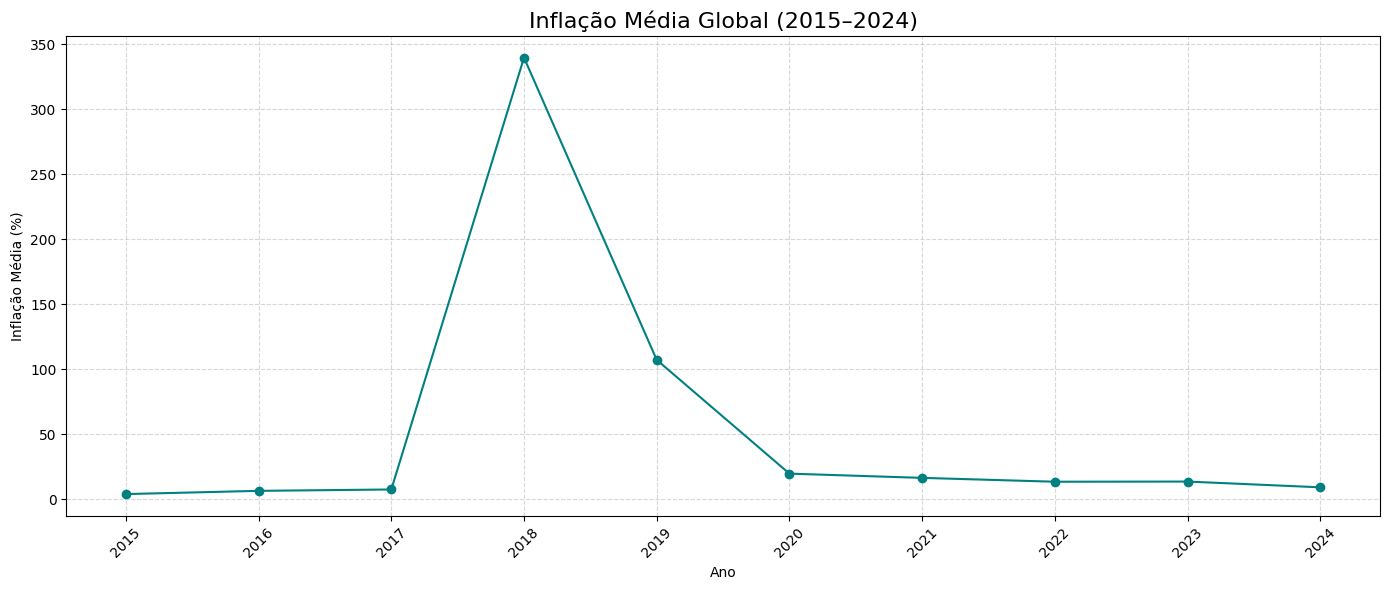

In [79]:

colunas_ano = [col for col in df.columns if col.isnumeric()]


df_anos = df[colunas_ano].apply(pd.to_numeric, errors='coerce')
media_global = df_anos.mean(axis=0)


plt.figure(figsize=(14, 6))
plt.plot(media_global.index, media_global.values, marker='o', linestyle='-', color='teal')
plt.title('Inflação Média Global (2015–2024)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Inflação Média (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Boxplot Interativo: Distribuição da Inflação por País (2015–2024)

## Objetivo:
Visualizar a **variação da inflação** em diferentes países ao longo do tempo, por meio de **boxplots animados** ano a ano.

---

## Etapas do código:

### 1. Transformar o DataFrame para formato longo (tidy)
```
df_long = df.melt(
    id_vars=['country_name', 'indicator_name'],
    value_vars=anos,
    var_name='Ano',
    value_name='Inflação'
)
````

* Transforma o DataFrame de formato **largo** (colunas = anos) para **longo** (colunas = país, ano, inflação).
* `id_vars`: mantém essas colunas fixas (`country_name`, `indicator_name`).
* `value_vars`: as colunas com valores de inflação (anos).
* Resultado: cada linha representa a inflação de um país em um ano.

---

### 2. Remover valores ausentes

```
df_long = df_long.dropna(subset=['Inflação', 'country_name'])
```

* Remove linhas com inflação ou nome de país ausentes, garantindo dados válidos.

---

### 3. Criar o boxplot animado com Plotly

```
fig = px.box(
    df_long,
    x='country_name',
    y='Inflação',
    color='country_name',
    animation_frame='Ano',
    title='Distribuição da Inflação por País (2015–2024)',
    labels={'country_name': 'País', 'Inflação': 'Inflação (%)'},
    category_orders={'country_name': sorted(df['country_name'].dropna().unique())}
)
```

* Cria um **boxplot para cada país**.
* `animation_frame='Ano'`: permite **navegar ano a ano** automaticamente.
* `color='country_name'`: dá uma cor única para cada país.
* `category_orders`: ordena os países alfabeticamente.

---

### 4. Ajustes finais de layout

```
fig.update_layout(showlegend=False, height=600)
fig.show()
```

* Remove a legenda (pois já há nomes nos eixos).
* Define altura do gráfico.
* Mostra a figura interativa no notebook.

---

## Resultado:

* Um gráfico interativo onde você pode **explorar a inflação por país ao longo dos anos**, observando:

  * **Variação interna** de cada país (distribuição, outliers).
  * **Comparações entre países** em um mesmo ano.
  * **Evolução temporal da inflação**.



In [80]:

df_long = df.melt(
    id_vars=['country_name', 'indicator_name'],
    value_vars=anos,
    var_name='Ano',
    value_name='Inflação'
)


df_long = df_long.dropna(subset=['Inflação', 'country_name'])


fig = px.box(
    df_long,
    x='country_name',
    y='Inflação',
    color='country_name',
    animation_frame='Ano',
    title='Distribuição da Inflação por País (2015–2024)',
    labels={'country_name': 'País', 'Inflação': 'Inflação (%)'},
    category_orders={'country_name': sorted(df['country_name'].dropna().unique())}
)

fig.update_layout(showlegend=False, height=600)
fig.show()



# Gráfico Interativo de Inflação por País (2015–2024)

## Objetivo:
Permitir que o usuário selecione um país e visualize sua **inflação anual de 2015 a 2024**, com destaque para eventos históricos globais.

---

## Etapas do Código:

### 1. Normalização dos nomes dos países
```
def normaliza(nome):
    return str(nome).replace('"','').replace("'",'').replace(',','').replace('.', '').replace('  ', ' ').strip()
````

* Limpa os nomes dos países removendo aspas, vírgulas, pontos e espaços duplos.
* Cria uma nova coluna com os nomes normalizados: `country_name_norm`.

---

### 2. Listar países disponíveis e preparar anos

```
paises_disponiveis = sorted(df['country_name_norm'].unique())
anos = [str(y) for y in range(2015, 2025)]
```

* Ordena alfabeticamente os países disponíveis para o `Dropdown`.
* Gera a lista de anos em formato de string.

---

### 3. Função para plotar a inflação de um país

```
def plot_inflacao_pais(pais):
```

* Recebe o nome normalizado do país selecionado.
* Busca o país no DataFrame.
* Extrai a série de inflação para os anos de 2015 a 2024.
* Converte os valores para numérico, lidando com dados ausentes.

#### Anotação de eventos históricos:

```python
  eventos = {
        '2015': 'Queda do petróleo',
        '2016': 'Brexit (Reino Unido)',
        '2018': 'Guerra comercial EUA-China',
        '2020': 'COVID-19',
        '2022': 'Guerra na Ucrânia',
        '2023': 'Inflação global + juros altos'
    }
```

* Marca visualmente eventos históricos relevantes que impactaram a economia global.

---

### 4. Criação do seletor interativo de país

```
pais_widget = widgets.Dropdown(...)
widgets.interact(plot_inflacao_pais, pais=pais_widget)
```

* Um menu dropdown com todos os países.
* Usa `ipywidgets` para atualizar o gráfico automaticamente ao selecionar um país.

---

## Resultado:

* Um gráfico de linha com a inflação anual do país selecionado.
* Permite análise temporal e contextualização com eventos globais.



In [81]:
# Função para normalizar nomes dos países
def normaliza(nome):
    return str(nome).replace('"','').replace("'",'').replace(',','').replace('.', '').replace('  ', ' ').strip()

# Criar a coluna normalizada (executar antes da função interativa)
df['country_name_norm'] = df['country_name'].apply(normaliza)

# Lista de países disponíveis ordenada
paises_disponiveis = sorted(df['country_name_norm'].unique())

# Lista de anos que serão exibidos no gráfico
anos = [str(y) for y in range(2015, 2025)]

# Função para plotar a inflação anual de um país com eventos históricos
def plot_inflacao_pais(pais):
    pais_idx = df[df['country_name_norm'] == pais].index
    if len(pais_idx) == 0:
        print("País não encontrado.")
        return
    pais_original = df.loc[pais_idx[0], 'country_name']
    serie = df[df['country_name_norm'] == pais][anos].values.flatten()
    serie = pd.to_numeric(serie, errors='coerce')
    if pd.isnull(serie).all():
        print("Sem dados para este país.")
        return

    plt.figure(figsize=(15,6))
    plt.plot(anos, serie, marker='o')
    plt.xlabel('Ano')
    plt.ylabel('Inflação (%)')
    plt.title(f'Inflação anual em {pais_original} (2015-2024)')
    plt.grid(True, linestyle='--', alpha=0.5)

    eventos = {
        '2015': 'Queda do petróleo',
        '2016': 'Brexit (Reino Unido)',
        '2018': 'Guerra comercial EUA-China',
        '2020': 'COVID-19',
        '2022': 'Guerra na Ucrânia',
        '2023': 'Inflação global + juros altos'
    }

    for ano_evento, evento in eventos.items():
        if ano_evento in anos and not pd.isnull(serie[anos.index(ano_evento)]):
            plt.annotate(evento,
                         xy=(ano_evento, serie[anos.index(ano_evento)]),
                         xytext=(ano_evento, max(serie) * 0.8),
                         arrowprops=dict(facecolor='black', shrink=0.05),
                         fontsize=10, color='red', rotation=15)

    plt.tight_layout()
    plt.show()

# Widget dropdown para seleção do país e interação
pais_widget = widgets.Dropdown(
    options=paises_disponiveis,
    value='United States' if 'United States' in paises_disponiveis else paises_disponiveis[0],
    description='País:'
)

widgets.interact(plot_inflacao_pais, pais=pais_widget)


interactive(children=(Dropdown(description='País:', index=186, options=('Afghanistan', 'Albania', 'Algeria', '…

<function __main__.plot_inflacao_pais(pais)>

# Top 10 Países com Maior Inflação Acumulada (2015–2024)

## Objetivo:
Identificar os países que mais sofreram com a inflação ao longo do período de 2015 a 2024, considerando o efeito **acumulado e composto** da inflação ano a ano.

---

## 1. Seleção de anos disponíveis
```
anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]
````

* Garante que só os anos realmente presentes no DataFrame sejam usados.
* Evita erros por colunas ausentes.

---

## 2. Função para calcular inflação acumulada

```
def infla_acumulada(serie):
```

* Converte os valores da série para numérico, removendo valores ausentes (`NaN`).
* Transforma as taxas anuais em **fatores de crescimento**:

  $$
  \text{fator} = 1 + \frac{\text{inflação}}{100}
  $$
* Calcula o **produto acumulado dos fatores** (efeito composto).
* Converte o resultado de volta para porcentagem.

---

## 3. Aplicação da função no DataFrame

```
df['infla_acumulada'] = df[anos].apply(infla_acumulada, axis=1)
```

* Aplica a função linha por linha (cada país).
* Cria uma nova coluna chamada `infla_acumulada`.

---

## 4. Ordenação e visualização

```
df_sorted = df.sort_values('infla_acumulada', ascending=False)
```

* Ordena os países do maior para o menor valor acumulado.

### Gráfico:

```
plt.barh(..., xscale='log')
```

* **Gráfico horizontal de barras** com os 10 maiores valores.
* Escala logarítmica no eixo X para facilitar a leitura de grandes discrepâncias (hiperinflação, por exemplo).
* As barras são coloridas em **vermelho ("tomato")** para destacar a severidade da inflação.

---

## Resultado:

* Visualização clara dos países mais afetados pela inflação no período de 2015 a 2024.
* Utilização de escala logarítmica ajuda a visualizar mesmo os países com inflação extremamente alta.



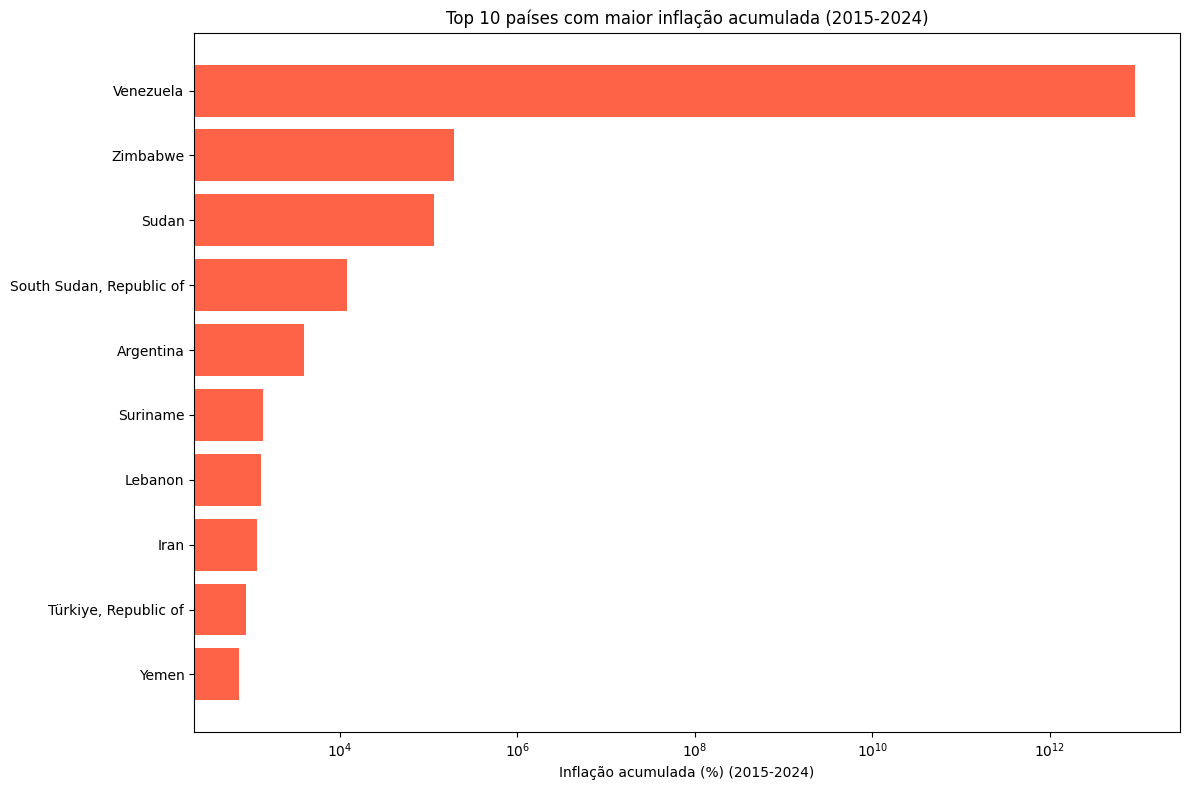

In [82]:
anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]

def infla_acumulada(serie):
    serie = pd.to_numeric(serie, errors='coerce')
    serie = serie[~pd.isnull(serie)]
    if len(serie) == 0:
        return np.nan
    fatores = 1 + serie / 100
    fatores = fatores[fatores > 0]
    if len(fatores) == 0:
        return np.nan
    return (np.prod(fatores) - 1) * 100

df['infla_acumulada'] = df[anos].apply(infla_acumulada, axis=1)
df_sorted = df.sort_values('infla_acumulada', ascending=False).reset_index(drop=True)

top_n = 10
plt.figure(figsize=(12,8))
bars = plt.barh(df_sorted['country_name'][:top_n][::-1], df_sorted['infla_acumulada'][:top_n][::-1], color='tomato')
plt.xlabel('Inflação acumulada (%) (2015-2024)')
plt.title(f'Top {top_n} países com maior inflação acumulada (2015-2024)')
plt.xscale('log')
plt.tight_layout()
plt.show()

# Comparação de Inflação Acumalada Entre Paises

## Objetivo:
O objetivo do código é permitir a comparação interativa da inflação acumulada entre dois países ao longo do período de 2015 a 2024. Ele tem como foco principal:

### 1. **Função de Normalização de Nomes de Países**
A função `normaliza()` serve para limpar e uniformizar os nomes dos países, removendo caracteres indesejados e sufixos comuns. Esse processo ajuda a garantir que a comparação de países seja feita de forma consistente. A função realiza as seguintes operações:
- Converte o nome para letras minúsculas.
- Remove pontuações como aspas, vírgulas, pontos e parênteses.
- Substitui espaços duplos por um único espaço.
- Remove sufixos comuns como "Republic", "Bolivarian", "The", "Of", e outros.
- Retorna o nome normalizado do país.

```
def normaliza(nome):
    nome = str(nome)
    nome = nome.lower()
    nome = re.sub(r'[\.\'",]', '', nome)
    nome = nome.replace('  ', ' ').strip()
    nome = nome.replace(' rb', '').replace(' república bolivariana', '')
    nome = nome.replace(' republic', '').replace(' bolivarian', '')
    nome = nome.replace(' the', '')
    nome = nome.replace(' of', '')
    nome = nome.replace(' and', '')
    nome = nome.replace('(', '').replace(')', '')
    nome = nome.strip()
    return nome
````

### 2. **Aplicação da Normalização ao DataFrame**

Após definir a função `normaliza()`, ela é aplicada à coluna `country_name` do DataFrame `df`, criando uma nova coluna chamada `country_name_norm` que contém os nomes dos países normalizados.

```
df['country_name_norm'] = df['country_name'].apply(normaliza)
```

### 3. **Criação de Dicionário de Países**

A criação de um dicionário `paises_dict` mapeia os nomes normalizados para os nomes originais, permitindo que o usuário selecione um país pelo nome normalizado e veja o nome original.

```
paises_dict = {normaliza(n): n for n in df['country_name'].unique()}
paises_disponiveis = sorted(paises_dict.keys())
```

### 4. **Definição de Anos Disponíveis**

A lista `anos` contém todos os anos de 2015 a 2024 presentes nas colunas do DataFrame. Apenas os anos que estão de fato como colunas no DataFrame são considerados.

```
anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]
```

### 5. **Função para Calcular Inflação Acumulada**

A função `infla_acumulada()` calcula a inflação acumulada, ou seja, o crescimento composto da inflação ao longo dos anos. A fórmula usada é:

$$
\text{Inflação acumulada} = \prod_{i=1}^n (1 + \frac{inflação_i}{100}) - 1
$$

Esta função utiliza a fórmula de juros compostos para calcular o crescimento acumulado a partir da série histórica de inflação.

```python
def infla_acumulada(serie):
    serie = pd.Series(serie)
    serie = pd.to_numeric(serie, errors='coerce')
    serie = serie.fillna(0) / 100
    return np.cumprod(1 + serie) - 1
```

### 6. **Função de Comparação de Inflação Acumulada Entre Dois Países**

A função `compara_paises()` recebe os nomes normalizados de dois países, encontra seus dados no DataFrame, calcula a inflação acumulada para cada país e plota um gráfico de linha comparando as duas séries ao longo do tempo.

O gráfico gerado exibe a inflação acumulada de cada país, com um marcador para cada ano. O gráfico também inclui a legenda, título e a grade para facilitar a leitura.

```
def compara_paises(pais1, pais2):
    idx1 = df[df['country_name_norm'] == pais1].index
    idx2 = df[df['country_name_norm'] == pais2].index
    if len(idx1) == 0 or len(idx2) == 0:
        print("País não encontrado.\nDica: Tente digitar só o nome principal, ex: 'venezuela'")
        return
    nome1 = df.loc[idx1[0], 'country_name']
    nome2 = df.loc[idx2[0], 'country_name']
    serie1 = df[df['country_name_norm'] == pais1][anos].values.flatten()
    serie2 = df[df['country_name_norm'] == pais2][anos].values.flatten()
    acumulada1 = infla_acumulada(serie1) * 100
    acumulada2 = infla_acumulada(serie2) * 100

    plt.figure(figsize=(15,6))
    plt.plot(anos, acumulada1, marker='o', label=nome1)
    plt.plot(anos, acumulada2, marker='s', label=nome2)
    plt.xlabel('Ano')
    plt.ylabel('Inflação acumulada (%)')
    plt.title(f'Comparação de inflação acumulada ({nome1} vs {nome2})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
```

### 7. **Widgets para Seleção Interativa de Países**

Usando a biblioteca `widgets` do `ipywidgets`, são criados dois dropdowns para que o usuário selecione dois países para comparar. A função `widgets.interact()` permite que o gráfico seja automaticamente atualizado sempre que o usuário escolhe países diferentes.

```
pais1_widget = widgets.Dropdown(
    options=[(paises_dict[n], n) for n in paises_disponiveis],
    value='brazil' if 'brazil' in paises_disponiveis else paises_disponiveis[0],
    description='País 1:'
)
pais2_widget = widgets.Dropdown(
    options=[(paises_dict[n], n) for n in paises_disponiveis],
    value='venezuela' if 'venezuela' in paises_disponiveis else paises_disponiveis[1],
    description='País 2:'
)

widgets.interact(compara_paises, pais1=pais1_widget, pais2=pais2_widget)
```

### 8. **Resultado Esperado**

O código cria um gráfico interativo que permite ao usuário comparar a inflação acumulada de dois países ao longo do tempo. O gráfico será atualizado sempre que o usuário mudar a seleção dos países nos dropdowns.

---


In [83]:

def normaliza(nome):
    nome = str(nome)
    nome = nome.lower()
    nome = re.sub(r'[\.\'",]', '', nome)
    nome = nome.replace('  ', ' ').strip()
    nome = nome.replace(' rb', '').replace(' república bolivariana', '')
    nome = nome.replace(' republic', '').replace(' bolivarian', '')
    nome = nome.replace(' the', '')
    nome = nome.replace(' of', '')
    nome = nome.replace(' and', '')
    nome = nome.replace('(', '').replace(')', '')
    nome = nome.strip()
    return nome

df['country_name_norm'] = df['country_name'].apply(normaliza)

paises_dict = {normaliza(n): n for n in df['country_name'].unique()}
paises_disponiveis = sorted(paises_dict.keys())

anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]

def infla_acumulada(serie):
    serie = pd.Series(serie)
    serie = pd.to_numeric(serie, errors='coerce')
    serie = serie.fillna(0) / 100
    return np.cumprod(1 + serie) - 1

def compara_paises(pais1, pais2):
    idx1 = df[df['country_name_norm'] == pais1].index
    idx2 = df[df['country_name_norm'] == pais2].index
    if len(idx1) == 0 or len(idx2) == 0:
        print("País não encontrado.\nDica: Tente digitar só o nome principal, ex: 'venezuela'")
        return
    nome1 = df.loc[idx1[0], 'country_name']
    nome2 = df.loc[idx2[0], 'country_name']
    serie1 = df[df['country_name_norm'] == pais1][anos].values.flatten()
    serie2 = df[df['country_name_norm'] == pais2][anos].values.flatten()
    acumulada1 = infla_acumulada(serie1) * 100
    acumulada2 = infla_acumulada(serie2) * 100

    plt.figure(figsize=(15,6))
    plt.plot(anos, acumulada1, marker='o', label=nome1)
    plt.plot(anos, acumulada2, marker='s', label=nome2)
    plt.xlabel('Ano')
    plt.ylabel('Inflação acumulada (%)')
    plt.title(f'Comparação de inflação acumulada ({nome1} vs {nome2})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

pais1_widget = widgets.Dropdown(
    options=[(paises_dict[n], n) for n in paises_disponiveis],
    value='brazil' if 'brazil' in paises_disponiveis else paises_disponiveis[0],
    description='País 1:'
)
pais2_widget = widgets.Dropdown(
    options=[(paises_dict[n], n) for n in paises_disponiveis],
    value='venezuela' if 'venezuela' in paises_disponiveis else paises_disponiveis[1],
    description='País 2:'
)

widgets.interact(compara_paises, pais1=pais1_widget, pais2=pais2_widget)

interactive(children=(Dropdown(description='País 1:', index=24, options=(('Afghanistan', 'afghanistan'), ('Alb…

<function __main__.compara_paises(pais1, pais2)>

# Inflação Média Anual por Continente
## Objetivo

O código tem como objetivo criar uma visualização interativa para comparar a inflação média anual entre continentes, com base nos dados de inflação de diferentes países. O usuário pode selecionar múltiplos continentes e um intervalo de anos para visualizar como a inflação variou ao longo do tempo em cada continente. A visualização é gerada utilizando um gráfico de linha, onde cada linha representa a inflação média anual de um continente ao longo dos anos.


### 1. **Função de Normalização dos Nomes dos Países**:

   * A função `normaliza` é responsável por padronizar os nomes dos países para facilitar as comparações. Ela transforma o nome para minúsculas, remove pontuações e sufixos, e remove espaços extras.

   ```
   def normaliza(nome):
       return str(nome).lower().strip().replace('"','').replace("'",'').replace(',','').replace('.', '').replace('  ', ' ')
   ```

### 2. **Listagem de Continentes e Países**:

   * Foram definidas listas com os nomes dos países organizados por continente (África, América do Sul, América do Norte, Europa, Ásia e Oceania). Esses nomes são normalizados para garantir consistência nos dados.

   ```
   africa = ['algeria', 'angola', ...]
   america_sul = ['argentina', 'bolivia', ...]
   # ...
   continentes = {'África': africa, 'América do Sul': america_sul, 'América do Norte': america_norte, 'Europa': europa, 'Ásia': asia, 'Oceania': oceania}
   ```

### 3. **Seleção de Anos Disponíveis**:

   * A lista `anos` contém os anos disponíveis nos dados (de 2015 a 2024), que são usados para calcular a inflação média anual de cada continente.

   ```
   anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]
   ```

### 4. **Cálculo da Inflação Média Anual por Continente**:

   * O código calcula a média da inflação anual para cada continente, agrupando os países de cada continente e aplicando o cálculo da média sobre os anos disponíveis.

   ```
   inflacao_continentes = pd.DataFrame(index=anos)
   for continente, paises in continentes.items():
       df_cont = df[df['country_name_norm'].isin(paises)]
       medias_anuais = df_cont[anos].apply(pd.to_numeric, errors='coerce').mean(axis=0)
       inflacao_continentes[continente] = medias_anuais.values
   ```

### 5. **Widgets Interativos**:

   * O código utiliza o `ipywidgets` para criar uma interface interativa onde o usuário pode selecionar os continentes e o intervalo de anos desejados.
   * O widget `continentes_widget` permite que o usuário selecione múltiplos continentes, enquanto o `ano_range_widget` permite selecionar um intervalo de anos.

   ```
   continentes_widget = widgets.SelectMultiple(options=sorted(continentes.keys()), value=tuple(sorted(continentes.keys())), description='Continentes', rows=6)
   ano_range_widget = widgets.SelectionRangeSlider(options=anos, index=(0, len(anos)-1), description='Intervalo de anos', orientation='horizontal')
   ```

### 6. **Função para Plotar o Gráfico**:

   * A função `plotar_grafico` recebe os continentes selecionados e o intervalo de anos e gera um gráfico de linha mostrando a inflação média anual para cada continente. O gráfico é exibido utilizando o `matplotlib`.

   ```
   def plotar_grafico(continentes_selecionados, intervalo_anos):
       # Geração do gráfico com as médias de inflação para os continentes selecionados e o intervalo de anos
   ```

### 7. **Interatividade**:

   * A função `on_change` é chamada toda vez que o usuário altera as seleções (continentes ou anos), e o gráfico é atualizado dinamicamente.

   ```
   continentes_widget.observe(on_change, names='value')
   ano_range_widget.observe(on_change, names='value')
   ```

### 8. **Botão de Reset**:

   * Um botão de reset permite que o usuário volte à seleção original, com todos os continentes e o intervalo completo de anos.

   ```
   botao_reset.on_click(on_reset_clicked)
   ```

### 9. **Exibição do Gráfico Inicial e dos Widgets**:

   * O código exibe os widgets e gera um gráfico inicial com a inflação média de todos os continentes para o intervalo completo de anos.

   ```
   display(widgets.VBox([continentes_widget, ano_range_widget, botao_reset, output]))
   ```



In [84]:



# Função para normalizar nomes
def normaliza(nome):
    return str(nome).lower().strip().replace('"','').replace("'",'').replace(',','').replace('.', '').replace('  ', ' ')

df['country_name_norm'] = df['country_name'].apply(normaliza)

# Continentes e países (nomes normalizados)
africa = ['algeria','angola','benin','botswana','burkina faso','burundi','cabo verde','cameroon','central african republic',
          'chad','comoros','congo dem rep of the','congo republic of','djibouti','egypt','equatorial guinea','eritrea',
          'eswatini','ethiopia','gabon','gambia the','ghana','guinea','guinea bissau','cote divoire','kenya','lesotho',
          'liberia','libya','madagascar','malawi','mali','mauritania','mauritius','morocco','mozambique','namibia','niger',
          'nigeria','rwanda','sao tome and principe','senegal','seychelles','sierra leone','somalia','south africa',
          'south sudan','sudan','tanzania','togo','tunisia','uganda','zambia','zimbabwe']
america_sul = ['argentina','bolivia','brazil','chile','colombia','ecuador','guyana','paraguay','peru','suriname','uruguay','venezuela']
america_norte = ['canada','united states','mexico','greenland','bermuda','saint pierre and miquelon']
europa = ['albania','andorra','armenia','austria','azerbaijan','belarus','belgium','bosnia and herzegovina','bulgaria',
          'croatia','cyprus','czech republic','denmark','estonia','finland','france','georgia','germany','greece','hungary',
          'iceland','ireland','italy','kazakhstan','kosovo','latvia','liechtenstein','lithuania','luxembourg','malta',
          'moldova','monaco','montenegro','netherlands','north macedonia','norway','poland','portugal','romania','russia',
          'san marino','serbia','slovakia','slovenia','spain','sweden','switzerland','turkey','ukraine','united kingdom',
          'vatican city']
asia = ['afghanistan','armenia','azerbaijan','bahrain','bangladesh','bhutan','brunei darussalam','cambodia','china peoples republic of',
        'cyprus','east timor','georgia','india','indonesia','iran','iraq','israel','japan','jordan','kazakhstan','kuwait',
        'kyrgyzstan','laos','lebanon','malaysia','maldives','mongolia','myanmar','nepal','north korea','oman','pakistan',
        'palestine','philippines','qatar','russia','saudi arabia','singapore','south korea','sri lanka','syria','taiwan',
        'tajikistan','thailand','turkey','turkmenistan','united arab emirates','uzbekistan','vietnam','yemen']
oceania = ['australia','fiji','kiribati','marshall islands','micronesia','nauru','new zealand','palau','papua new guinea',
           'samoa','solomon islands','tonga','tuvalu','vanuatu']

continentes = {
    'África': africa,
    'América do Sul': america_sul,
    'América do Norte': america_norte,
    'Europa': europa,
    'Ásia': asia,
    'Oceania': oceania
}

# Anos disponíveis
anos = [str(y) for y in range(2015, 2025) if str(y) in df.columns]

# Pré-calcular inflação média anual por continente
inflacao_continentes = pd.DataFrame(index=anos)
for continente, paises in continentes.items():
    df_cont = df[df['country_name_norm'].isin(paises)]
    medias_anuais = df_cont[anos].apply(pd.to_numeric, errors='coerce').mean(axis=0)
    inflacao_continentes[continente] = medias_anuais.values

# Widgets
continentes_widget = widgets.SelectMultiple(
    options=sorted(continentes.keys()),
    value=tuple(sorted(continentes.keys())),
    description='Continentes',
    rows=6,
    style={'description_width': 'initial'}
)

ano_range_widget = widgets.SelectionRangeSlider(
    options=anos,
    index=(0, len(anos)-1),
    description='Intervalo de anos',
    orientation='horizontal',
    layout={'width': '700px'},
    style={'description_width': 'initial'}
)

botao_reset = widgets.Button(description='Resetar filtros', button_style='warning')

output = widgets.Output()

def plotar_grafico(continentes_selecionados, intervalo_anos):
    with output:
        clear_output(wait=True)
        if not continentes_selecionados:
            print("Selecione ao menos um continente.")
            return
        anos_selecionados = anos[anos.index(intervalo_anos[0]):anos.index(intervalo_anos[1])+1]
        fig, ax = plt.subplots(figsize=(14,8))
        for cont in continentes_selecionados:
            dados = inflacao_continentes.loc[anos_selecionados, cont]
            ax.plot(anos_selecionados, dados, marker='o', label=cont)
        ax.set_title('Inflação Média Anual por Continente')
        ax.set_xlabel('Ano')
        ax.set_ylabel('Inflação Média (%)')
        plt.xticks(rotation=45)
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

def on_change(change):
    plotar_grafico(continentes_widget.value, ano_range_widget.value)

def on_reset_clicked(b):
    continentes_widget.value = tuple(sorted(continentes.keys()))
    ano_range_widget.value = (anos[0], anos[-1])

continentes_widget.observe(on_change, names='value')
ano_range_widget.observe(on_change, names='value')
botao_reset.on_click(on_reset_clicked)

# Mostrar widgets e gráfico
display(widgets.VBox([
    continentes_widget,
    ano_range_widget,
    botao_reset,
    output
]))

# Plot inicial
# plotar_grafico(continentes_widget.value, ano_range_widget.val) # Linha original com erro
plotar_grafico(continentes_widget.value, ano_range_widget.value) # Correção: usar .value



##  Top países com maior REDUÇÃO de inflação em 2024'

Este código permite visualizar os países com **maior aumento** ou **maior redução** na inflação projetada para 2024 em relação à média dos anos de 2015 a 2023.

O gráfico é interativo via `ipywidgets` e possui filtros para:

* Número de países exibidos;
* Ocultação de outliers extremos que distorcem a escala.

---

### Pré-processamento dos dados

```
anos_hist = [str(ano) for ano in range(2015, 2024)]
df['media_2015_2023'] = df[anos_hist].apply(pd.to_numeric, errors='coerce').mean(axis=1)
df['dif_2024_vs_media'] = pd.to_numeric(df['2024'], errors='coerce') - df['media_2015_2023']
```

* Calcula a **média histórica da inflação** para cada país de 2015 a 2023.
* Calcula a **diferença da projeção de 2024 em relação à média histórica**, criando a coluna `dif_2024_vs_media`.

---

###  Função principal para visualização

```
def mostrar_top_variacoes(tipo='Aumento', top_n=10, limitar_outlier=True):
```

* Cria a função para gerar o gráfico.
* Parâmetros:

  * `tipo`: define se será analisado aumento ou redução;
  * `top_n`: número de países exibidos;
  * `limitar_outlier`: se True, exclui variações muito extremas (> ±500%).

---

####  Filtragem e ordenação

```
df_valid = df.dropna(subset=['dif_2024_vs_media', 'country_name']).copy()
if limitar_outlier:
    df_valid = df_valid[df_valid['dif_2024_vs_media'].between(-500, 500)]
```

* Remove países com dados ausentes.
* Limita a análise visualmente a variações de até ±500% (para evitar distorções por países como Venezuela, Sudão, etc.).

---

#### Ordenação por tipo

```
if tipo == 'Aumento':
    top_df = df_valid.sort_values('dif_2024_vs_media', ascending=False).head(top_n)
    titulo = f'Top {top_n} países com maior AUMENTO de inflação em 2024'
    cor = '#c0392b'  # vermelho escuro
else:
    top_df = df_valid.sort_values('dif_2024_vs_media').head(top_n)
    titulo = f'Top {top_n} países com maior REDUÇÃO de inflação em 2024'
    cor = '#27ae60'  # verde escuro
```

* Organiza os países com maior aumento ou redução, de acordo com a escolha do usuário.

---

###  Criação do gráfico com Seaborn

```python
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='dif_2024_vs_media', y='country_name', data=top_df, color=cor)
```

* Cria um gráfico de barras horizontais com as variações inflacionárias.

---

#### Adição de valores nas barras

```
for i, v in enumerate(top_df['dif_2024_vs_media']):
    ax.text(v, i, f'{v:.1f}', color='black', va='center', fontweight='bold')
```

* Exibe o valor numérico da variação diretamente ao lado de cada barra.

---

####  Ajustes estéticos finais

```
plt.xlabel('Variação (2024 - média 2015–2023)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title(titulo, fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
```

* Define rótulos dos eixos, título e estilo da grade.
* Usa `tight_layout()` para evitar sobreposição de elementos.

---

###  Interatividade com widgets

```
widgets.interact(
    mostrar_top_variacoes,
    tipo=['Aumento', 'Redução'],
    top_n=widgets.IntSlider(min=3, max=20, step=1, value=10, description='Top N'),
    limitar_outlier=widgets.Checkbox(value=True, description='Limitar outliers visuais')
);
```

* Cria uma **interface interativa** com:

  * Seleção entre **Aumento** e **Redução**;
  * Controle do número de países a exibir (`Top N`);
  * Opção de **remover outliers visuais** para clareza.

---

### Resultado final
Um gráfico claro, configurável e informativo, ideal para:

* **Análise de impacto econômico**;
* **Detecção de países em recuperação ou crise**;
* **Contextualização geopolítica** de variações inflacionárias.




In [85]:

anos_hist = [str(ano) for ano in range(2015, 2024)]  # 2015 a 2023
df['media_2015_2023'] = df[anos_hist].apply(pd.to_numeric, errors='coerce').mean(axis=1)
df['dif_2024_vs_media'] = pd.to_numeric(df['2024'], errors='coerce') - df['media_2015_2023']

def mostrar_top_variacoes(tipo='Aumento', top_n=10, limitar_outlier=True):
    df_valid = df.dropna(subset=['dif_2024_vs_media', 'country_name']).copy()

    if limitar_outlier:
        # Limita variação a um intervalo aceitável visualmente (ex: ±500%)
        df_valid = df_valid[df_valid['dif_2024_vs_media'].between(-500, 500)]

    if tipo == 'Aumento':
        top_df = df_valid.sort_values('dif_2024_vs_media', ascending=False).head(top_n)
        titulo = f'Top {top_n} países com maior AUMENTO de inflação em 2024'
        cor = '#c0392b'  # vermelho escuro
    else:
        top_df = df_valid.sort_values('dif_2024_vs_media').head(top_n)
        titulo = f'Top {top_n} países com maior REDUÇÃO de inflação em 2024'
        cor = '#27ae60'  # verde escuro

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        x='dif_2024_vs_media',
        y='country_name',
        data=top_df,
        color=cor
    )

    # Adiciona os valores nas barras
    for i, v in enumerate(top_df['dif_2024_vs_media']):
        ax.text(v, i, f'{v:.1f}', color='black', va='center', fontweight='bold')

    plt.xlabel('Variação (2024 - média 2015–2023)', fontsize=12)
    plt.ylabel('País', fontsize=12)
    plt.title(titulo, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Widget interativo com número de países e opção de truncar outliers
widgets.interact(
    mostrar_top_variacoes,
    tipo=['Aumento', 'Redução'],
    top_n=widgets.IntSlider(min=3, max=20, step=1, value=10, description='Top N'),
    limitar_outlier=widgets.Checkbox(value=True, description='Limitar outliers visuais')
);


interactive(children=(Dropdown(description='tipo', options=('Aumento', 'Redução'), value='Aumento'), IntSlider…

## Gráfico Interativo: Inflação Projetada (2024) vs Média Histórica (2015–2023)

Este gráfico permite explorar a **diferença entre a projeção de inflação para 2024** e a **média de inflação entre 2015 e 2023** para países do mundo. Ele oferece:

* Visualização interativa com **hover detalhado**;
* Filtro por país via **menu suspenso**;
* Cores representando o **delta da inflação** (`Δ Inflação` = projeção - média histórica);
* Linha de referência onde a inflação projetada = média histórica.

---

###  Filtragem de dados e limites visuais

```python
limite_max = 100
df_interativo = df[
    (df['media_2015_2023'] <= limite_max) &
    (df['2024'] <= limite_max) &
    (~df['media_2015_2023'].isna()) &
    (~df['2024'].isna())
].copy()
```

* Define um **limite de 100%** para evitar distorções causadas por outliers extremos (ex: Venezuela).
* Remove linhas com dados ausentes nas colunas `media_2015_2023` e `2024`.

---

###  Criação da estrutura para os traços e botões

```python
paises = sorted(df_interativo['country_name'].unique())
traces = []
buttons = []
```

* Lista todos os países únicos disponíveis para plotagem.
* Prepara listas para armazenar os traços (`traces`) e os botões do menu suspenso.

---

###  Traço principal: todos os países

```python
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_interativo['media_2015_2023'],
    y=df_interativo['2024'],
    mode='markers',
    marker=dict(
        color=df_interativo['diferença_2024_vs_media'],
        colorscale='RdBu',
        colorbar=dict(title='Δ Inflação'),
        showscale=True,
        size=10,
        line=dict(width=1, color='black')
    ),
    text=df_interativo['country_name'],
    name='Todos os países',
    hovertemplate=(...)
))
```

* Plota todos os países como **bolhas coloridas**, onde:

  * Eixo X: inflação média histórica (2015–2023);
  * Eixo Y: projeção para 2024;
  * Cor: variação da inflação (2024 - média).
* `hovertemplate` mostra nome do país e valores numéricos com formatação clara.

---

### Botão para mostrar todos os países

```python
buttons.append(dict(
    label='Todos',
    method='update',
    args=[{'visible': [True] + [False] * len(paises)},
          {'title': 'Todos os países'}]
))
```

* Cria o botão **"Todos"** no menu, que ativa apenas o primeiro traço (com todos os países visíveis).

---

###  Traços individuais por país

```python
for i, pais in enumerate(paises):
    df_pais = df_interativo[df_interativo['country_name'] == pais]
    trace = go.Scatter(...)
    fig.add_trace(trace)
    
    visible_flags = [False] * (len(paises) + 1)
    visible_flags[i + 1] = True  # ativa apenas o traço do país selecionado
    
    buttons.append(dict(
        label=pais,
        method='update',
        args=[{'visible': visible_flags},
              {'title': f'Inflação projetada vs Média histórica - {pais}'}]
    ))
```

* Cria um **traço exclusivo para cada país**, com destaque visual:

  * Cor azul escura (`darkblue`);
  * Tamanho maior;
  * Nome do país visível acima do ponto.
* Cada botão no menu ativa **apenas o traço correspondente**.

---

### Linha de referência: sem variação

```python
fig.add_shape(
    type='line',
    x0=0, y0=0,
    x1=limite_max, y1=limite_max,
    line=dict(color='black', dash='dash'),
    name='Sem variação'
)
```

* Adiciona uma **linha pontilhada diagonal**, representando os países onde:

  * Projeção de 2024 ≈ Média histórica (2015–2023)
* Serve como **linha de equilíbrio visual**.

---

###  Layout e menu interativo

```python
fig.update_layout(
    title='Inflação projetada vs Média histórica (2015–2023)',
    xaxis_title='Inflação média (2015–2023)',
    yaxis_title='Inflação projetada para 2024',
    template='plotly_white',
    width=950,
    height=600,
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.02,
            xanchor="left",
            y=1.2,
            yanchor="top"
        )
    ]
)
```

* Define o layout do gráfico:

  * Títulos;
  * Tamanho;
  * Estilo de fundo branco;
  * Menu suspenso com todos os botões de país.

---

###  `fig.show()`

```python
fig.show()
```

* Exibe o gráfico no navegador ou no notebook com total interatividade.

---

###  Resultado final

Um **gráfico de dispersão interativo** que permite:

* Comparar a inflação projetada com a média histórica;
* Investigar variações extremas;
* Focar em um país específico com clareza;
* Interpretar visualmente quem está estabilizando, inflacionando ou recuperando.

---


In [87]:

# Define o limite máximo para evitar distorções por outliers
limite_max = 100

# Calcular a média e a diferença ANTES de filtrar para df_interativo
# Definir anos históricos
anos_hist = [str(ano) for ano in range(2015, 2024)]  # 2015 a 2023
# Calcular a média para os anos históricos
df['media_2015_2023'] = df[anos_hist].apply(pd.to_numeric, errors='coerce').mean(axis=1)
# Calcular a diferença entre 2024 e a média histórica
df['diferença_2024_vs_media'] = pd.to_numeric(df['2024'], errors='coerce') - df['media_2015_2023']


# Filtra dados para visualização
df_interativo = df[
    (df['media_2015_2023'] <= limite_max) &
    (df['2024'] <= limite_max) &
    (~df['media_2015_2023'].isna()) &
    (~df['2024'].isna())
].copy()

# Lista de países únicos
paises = sorted(df_interativo['country_name'].unique())
traces = []
buttons = []

# Traço com todos os países (visível por padrão)
fig = go.Figure()

# Adiciona o traço completo
fig.add_trace(go.Scatter(
    x=df_interativo['media_2015_2023'],
    y=df_interativo['2024'],
    mode='markers',
    marker=dict(
        # Agora a coluna 'diferença_2024_vs_media' existe em df_interativo
        color=df_interativo['diferença_2024_vs_media'],
        colorscale='RdBu',
        colorbar=dict(title='Δ Inflação'),
        showscale=True,
        size=10,
        line=dict(width=1, color='black')
    ),
    text=df_interativo['country_name'],
    name='Todos os países',
    hovertemplate=(
        '<b>%{text}</b><br>' +
        'Média 2015–2023: %{x:.2f}%<br>' +
        'Projeção 2024: %{y:.2f}%<br>' +
        '<extra></extra>'
    ),
    visible=True
))

# Botão para mostrar todos
buttons.append(dict(
    label='Todos',
    method='update',
    args=[{'visible': [True] + [False] * len(paises)},
          {'title': 'Todos os países'}]
))

# Traços individuais por país (inicialmente invisíveis)
for i, pais in enumerate(paises):
    df_pais = df_interativo[df_interativo['country_name'] == pais]
    trace = go.Scatter(
        x=df_pais['media_2015_2023'],
        y=df_pais['2024'],
        mode='markers+text',
        text=[pais],
        textposition='top center',
        marker=dict(
            color='darkblue',
            size=12,
            line=dict(width=2, color='black')
        ),
        name=pais,
        visible=False,
        hovertemplate=(
            '<b>%{text}</b><br>' +
            'Média 2015–2023: %{x:.2f}%<br>' +
            'Projeção 2024: %{y:.2f}%<br>' +
            '<extra></extra>'
        )
    )
    fig.add_trace(trace)
    # Botão correspondente
    visible_flags = [False] * (len(paises) + 1)
    visible_flags[i + 1] = True  # +1 porque o traço 0 é "Todos"
    buttons.append(dict(
        label=pais,
        method='update',
        args=[{'visible': visible_flags},
              {'title': f'Inflação projetada vs Média histórica - {pais}'}]
    ))

# Linha de referência (sem variação)
fig.add_shape(
    type='line',
    x0=0, y0=0,
    x1=limite_max, y1=limite_max,
    line=dict(color='black', dash='dash'),
    name='Sem variação'
)

# Layout final
fig.update_layout(
    title='Inflação projetada vs Média histórica (2015–2023)',
    xaxis_title='Inflação média (2015–2023)',
    yaxis_title='Inflação projetada para 2024',
    template='plotly_white',
    width=950,
    height=600,
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.02,
            xanchor="left",
            y=1.2,
            yanchor="top"
        )
    ]
)

fig.show()